# Libraries

In [ ]:
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from prettytable import PrettyTable
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Count the occurrences of each digit in the training set
train_digit_counts = np.bincount(y_train)

# Count the occurrences of each digit in the testing set
test_digit_counts = np.bincount(y_test)

# Calculate the subtotal by adding the counts from the training and testing sets
subtotal_digit_counts = train_digit_counts + test_digit_counts

# Calculate the total counts by summing the subtotal counts
total_digit_counts = np.sum(subtotal_digit_counts)

# Generate x-axis labels for each digit
digits = np.arange(10)

# Create a table
table = []
for digit, train_count, test_count, subtotal_count in zip(
    digits, train_digit_counts, test_digit_counts, subtotal_digit_counts
):
    table.append([digit, train_count, test_count, subtotal_count])

# Append a row for the subtotal
table.append(["Subtotal", np.sum(train_digit_counts), np.sum(test_digit_counts), np.sum(subtotal_digit_counts)])

# Append a row for the total
table.append(["Total", "", "", total_digit_counts])

# Define the table headers
headers = ["Digit", "Training Set", "Testing Set", "Subtotal"]

# Print the table
print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════╤════════════════╤═══════════════╤════════════╕
│ Digit    │ Training Set   │ Testing Set   │   Subtotal │
╞══════════╪════════════════╪═══════════════╪════════════╡
│ 0        │ 5923           │ 980           │       6903 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 1        │ 6742           │ 1135          │       7877 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 2        │ 5958           │ 1032          │       6990 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 3        │ 6131           │ 1010          │       7141 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 4        │ 5842           │ 982           │       6824 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 5        │ 5421           │ 892           │       6313 │
├──────────┼────────────────┼───────────────┼────────────┤
│ 6        │ 5918           │ 958           │       6876 │
├──────────┼────────────────┼───────────────┼───────────

# Pre-processing

In [ ]:
# Reshape and normalize the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0


# Logistic Regression

In [ ]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
logreg_predictions = logreg.predict(x_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Calculate precision, recall, and F1-score
logreg_report = classification_report(y_test, logreg_predictions)
print("Logistic Regression Report:")
print(tabulate([logreg_report.split('\n')[i].split() for i in range(1, 12)], headers=['Digits', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))


Logistic Regression Accuracy: 0.9256
Logistic Regression Report:
|   Digits |   Precision |   Recall |   F1-Score |
|----------+-------------+----------+------------|
|          |             |          |            |
|        0 |        0.95 |     0.97 |       0.96 |
|        1 |        0.96 |     0.98 |       0.97 |
|        2 |        0.93 |     0.9  |       0.91 |
|        3 |        0.9  |     0.92 |       0.91 |
|        4 |        0.94 |     0.94 |       0.94 |
|        5 |        0.9  |     0.87 |       0.88 |
|        6 |        0.94 |     0.95 |       0.95 |
|        7 |        0.93 |     0.92 |       0.93 |
|        8 |        0.88 |     0.88 |       0.88 |
|        9 |        0.91 |     0.92 |       0.91 |


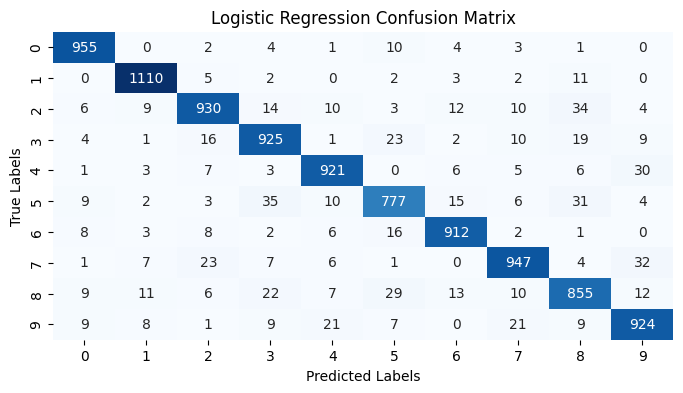

In [ ]:
# Calculate confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(logreg_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Support Vector Machine

In [ ]:
# Initialize and train the SVM model
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [ ]:
# Predict on the test set
svm_predictions = svm.predict(x_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machines Accuracy:", svm_accuracy)

# Calculate precision, recall, and F1-score
svm_report = classification_report(y_test, svm_predictions)
print("Support Vector Machines Report:")
print(tabulate([svm_report.split('\n')[i].split() for i in range(1, 12)], headers=['Digits', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))

Support Vector Machines Accuracy: 0.9792
Support Vector Machines Report:
|   Digits |   Precision |   Recall |   F1-Score |
|----------+-------------+----------+------------|
|          |             |          |            |
|        0 |        0.98 |     0.99 |       0.99 |
|        1 |        0.99 |     0.99 |       0.99 |
|        2 |        0.98 |     0.97 |       0.98 |
|        3 |        0.97 |     0.99 |       0.98 |
|        4 |        0.98 |     0.98 |       0.98 |
|        5 |        0.99 |     0.98 |       0.98 |
|        6 |        0.99 |     0.99 |       0.99 |
|        7 |        0.98 |     0.97 |       0.97 |
|        8 |        0.97 |     0.98 |       0.97 |
|        9 |        0.97 |     0.96 |       0.97 |


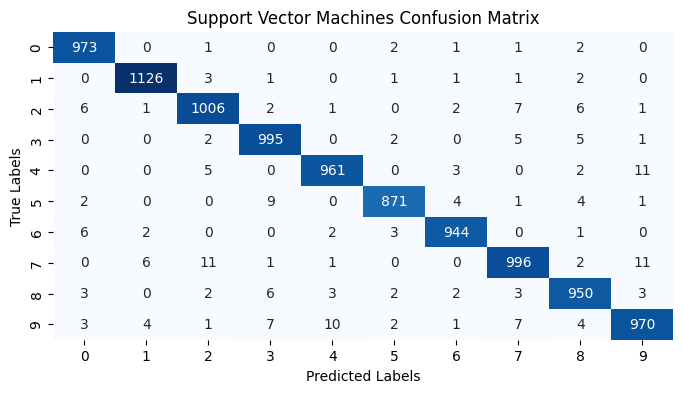

In [ ]:
# Calculate confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Support Vector Machines Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Compare

In [ ]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:")
print(tabulate([logreg_report.split('\n')[i].split() for i in range(1, 12)], headers=['Class', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))

print("\nSupport Vector Machines Accuracy:", svm_accuracy)
print("Support Vector Machines Report:")
print(tabulate([svm_report.split('\n')[i].split() for i in range(1, 12)], headers=['Class', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))

Logistic Regression Accuracy: 0.9256
Logistic Regression Report:
|   Class |   Precision |   Recall |   F1-Score |
|---------+-------------+----------+------------|
|         |             |          |            |
|       0 |        0.95 |     0.97 |       0.96 |
|       1 |        0.96 |     0.98 |       0.97 |
|       2 |        0.93 |     0.9  |       0.91 |
|       3 |        0.9  |     0.92 |       0.91 |
|       4 |        0.94 |     0.94 |       0.94 |
|       5 |        0.9  |     0.87 |       0.88 |
|       6 |        0.94 |     0.95 |       0.95 |
|       7 |        0.93 |     0.92 |       0.93 |
|       8 |        0.88 |     0.88 |       0.88 |
|       9 |        0.91 |     0.92 |       0.91 |

Support Vector Machines Accuracy: 0.9792
Support Vector Machines Report:
|   Class |   Precision |   Recall |   F1-Score |
|---------+-------------+----------+------------|
|         |             |          |            |
|       0 |        0.98 |     0.99 |       0.99 |
|       1 |

In [ ]:
# Create the data for the table
data = [['SVM', svm_accuracy], ['Logistic Regression', logreg_accuracy]]

# Define the headers
headers = ['Model', 'Accuracy']

# Generate the table in fancy format
table = tabulate(data, headers, tablefmt='fancy_grid')

# Print the table
print(table)

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ SVM                 │     0.9792 │
├─────────────────────┼────────────┤
│ Logistic Regression │     0.9256 │
╘═════════════════════╧════════════╛


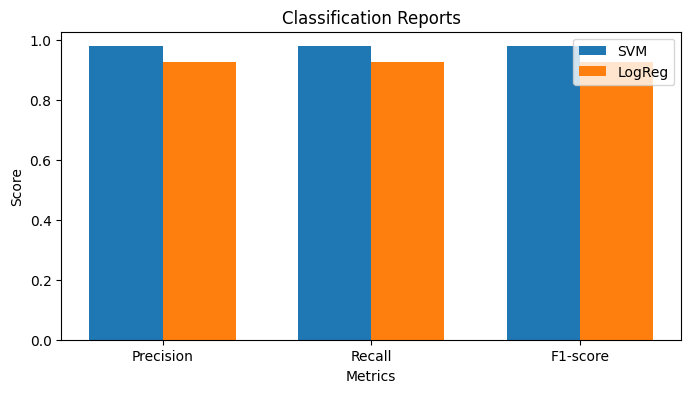

In [ ]:
# Obtain the classification reports for SVM and LogReg
svm_report = classification_report(y_test, svm_predictions, output_dict=True)
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)

# Extract the precision, recall, and f1-score values from the reports
svm_scores = [svm_report['weighted avg'][metric] for metric in ['precision', 'recall', 'f1-score']]
logreg_scores = [logreg_report['weighted avg'][metric] for metric in ['precision', 'recall', 'f1-score']]

# Define the metrics and models
metrics = ['Precision', 'Recall', 'F1-score']
models = ['SVM', 'LogReg']

# Create a bar plot
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 4))
svm_bars = ax.bar(x, svm_scores, width, label='SVM')
logreg_bars = ax.bar([val + width for val in x], logreg_scores, width, label='LogReg')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Reports')
ax.set_xticks([val + width/2 for val in x])
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()

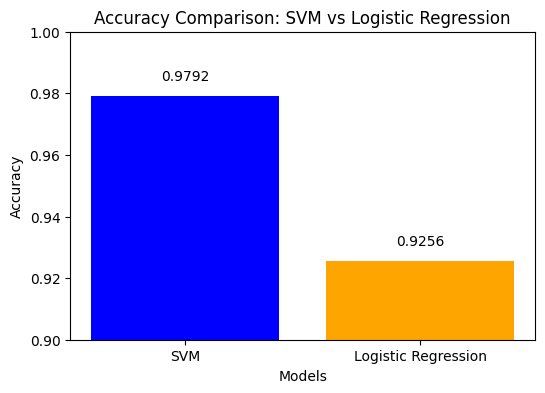

In [ ]:
# Create a bar plot
plt.figure(figsize=(6, 4))
models = ['SVM', 'Logistic Regression']
accuracy = [svm_accuracy, logreg_accuracy]
colors = ['blue', 'orange']

plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM vs Logistic Regression')
plt.ylim([0.9, 1.0])

# Add the accuracy values on top of each bar
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, str(round(v, 4)), ha='center', fontsize=10)

plt.show()

# Logistic Regression Random Search

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 4, 20),
    'solver': ['liblinear']
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Perform random search for hyperparameter optimization
logreg_random = RandomizedSearchCV(logreg, param_grid, n_iter=2, cv=3, random_state=42, n_jobs=-1)

# Fit the model with the optimized hyperparameters
logreg_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=2, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 1.62377674e+00, 2.63665090e+00, 4.28133240e+00,
       6.95192796e+00, 1.12883789e+01, 1.83298071e+01, 2.97635144e+01,
       4.83293024e+01, 7.84759970e+01, 1.27427499e+02, 2.06913808e+02,
       3.35981829e+02, 5.45559478e+02, 8.85866790e+02, 1.43844989e+03,
       2.33572147e+03, 3.79269019e+03, 6.15848211e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42)

In [ ]:
# Predict on the test set using the optimized model
logreg_predictions = logreg_random.predict(x_test)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Calculate precision, recall, and F1-score
logreg_report = classification_report(y_test, logreg_predictions)
print("Logistic Regression Report:")
print(tabulate([logreg_report.split('\n')[i].split() for i in range(1, 12)], headers=['Digits', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))




Logistic Regression Accuracy: 0.9199
Logistic Regression Report:
|   Digits |   Precision |   Recall |   F1-Score |
|----------+-------------+----------+------------|
|          |             |          |            |
|        0 |        0.95 |     0.98 |       0.96 |
|        1 |        0.96 |     0.98 |       0.97 |
|        2 |        0.94 |     0.89 |       0.91 |
|        3 |        0.9  |     0.91 |       0.9  |
|        4 |        0.92 |     0.93 |       0.92 |
|        5 |        0.89 |     0.86 |       0.88 |
|        6 |        0.94 |     0.95 |       0.94 |
|        7 |        0.93 |     0.92 |       0.93 |
|        8 |        0.87 |     0.87 |       0.87 |
|        9 |        0.9  |     0.89 |       0.89 |


In [ ]:
# Calculate confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(logreg_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Support Vector MAchine Random Search

In [ ]:
# Define the parameter grid for hyperparameter search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Initialize and train the SVM model with hyperparameter search
svm = SVC()
svm_random_search = RandomizedSearchCV(svm, param_grid, n_iter=1, cv=3, random_state=42, n_jobs=-1)
svm_random_search.fit(x_train, y_train)



KeyboardInterrupt: ignored

In [ ]:
# Predict on the test set using the best estimator from random search
svm_predictions = svm_random_search.predict(x_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machines Accuracy:", svm_accuracy)

In [ ]:
# Calculate precision, recall, and F1-score
svm_report = classification_report(y_test, svm_predictions)
print("Support Vector Machines Report:")
print(tabulate([svm_report.split('\n')[i].split() for i in range(1, 12)], headers=['Digits', 'Precision', 'Recall', 'F1-Score'], tablefmt='orgtbl'))

In [ ]:
# Calculate confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(svm_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Support Vector Machines Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()